In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
print(os.listdir())

['gensimtutorial.py', 'biz_2star.csv', 'EDA Pt 3.ipynb', 'biz_3star.csv', 'first_buz.csv', '.DS_Store', 'Data Preparation.ipynb', 'Archive', '100buz.csv', 'Untitled.ipynb', 'EDA pt 2.ipynb', 'stats100.csv', 'dirichlet_plots.png', '10buz.csv', 'stats.csv', 'dirichletplot.py', 'LDAVisual.py', 'Yelper.py', '__pycache__', 'doc_topic.csv', 'stats500.csv', 'FINALL_doc_topic.csv', 'BusinessKeywords.csv', 'Final EDA Pt 1.ipynb', '1000buz.csv', 'LDA.png', 'yelp_dataset', 'sample_buz.csv', 'topic_mixture.csv', 'Lab.ipynb', 'PreEDA.ipynb', 'KNN Review2.ipynb', '.ipynb_checkpoints', 'LDAVisual 2.py', 'LDAFINALTEST.ipynb', 'Final training.ipynb', 'Lab 1 Project.ipynb', 'KMeaned.csv', 'LDAVisual.py.zip', 'n-gram and pre-processing lab.ipynb', '500buz.csv', 'KMeans.ipynb', 'Final Data Collection.ipynb', 'simpleLDA.py']


In [207]:
stat_df = pd.read_csv('stats100.csv')
stat_df.drop(['Unnamed: 0'],axis = 1,inplace = True)
stat_df.head()

,business_id,name,category,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,...,topic 20,topic 21,topic 22,topic 23,topic 24,topic 25,topic 26,topic 27,topic 28,topic 29
0,0FUtlsQrJI7LhqDPxLumEw,Joe's Farm Grill,"Pizza, Italian, Restaurants, Salad, Local Flav...",2.316944,1.841766,1.455655,0.766688,10.522626,5.184855,1.820611,...,4.359949,0.310949,0.312416,2.882795,1.718484,1.112601,8.368819,8.100148,0.977485,1.580758
1,0W4lkclzZThpx3V65bVgig,Schwartz's,"Specialty Food, Sandwiches, Food, Imported Foo...",6.247231,1.033486,1.923833,1.385940,3.381270,2.473048,0.605877,...,36.874209,1.265858,0.544051,1.071138,1.232881,0.578504,6.577596,6.556546,0.640568,0.912432
2,2iTsRqUsPGRH1li1WVRvKQ,Carson Kitchen,"Bars, Restaurants, Nightlife, Cocktail Bars, A...",5.987994,0.575344,0.772781,1.079965,11.297619,4.249134,0.147583,...,0.322572,0.563241,0.943076,0.776258,1.866582,0.226336,3.100975,34.769070,1.246560,0.405583
3,2weQS-RnoOBhb1KsHKyoSQ,The Buffet,"Beauty & Spas, Food, Event Planning & Services...",2.228406,0.603006,1.035680,0.360797,13.055941,1.713159,0.691727,...,1.412371,0.310201,0.270865,0.594542,1.072503,0.137659,4.333153,6.088799,1.148005,1.808079
4,3BCsAgo_1i4xMuTyLKMLRQ,SkinnyFATS,"Food Delivery Services, Juice Bars & Smoothies...",1.747899,1.018882,0.636233,1.108561,10.035819,1.767835,1.884558,...,3.087254,2.096378,0.570430,0.233099,1.502649,0.013229,5.692184,17.713864,1.388517,0.417956


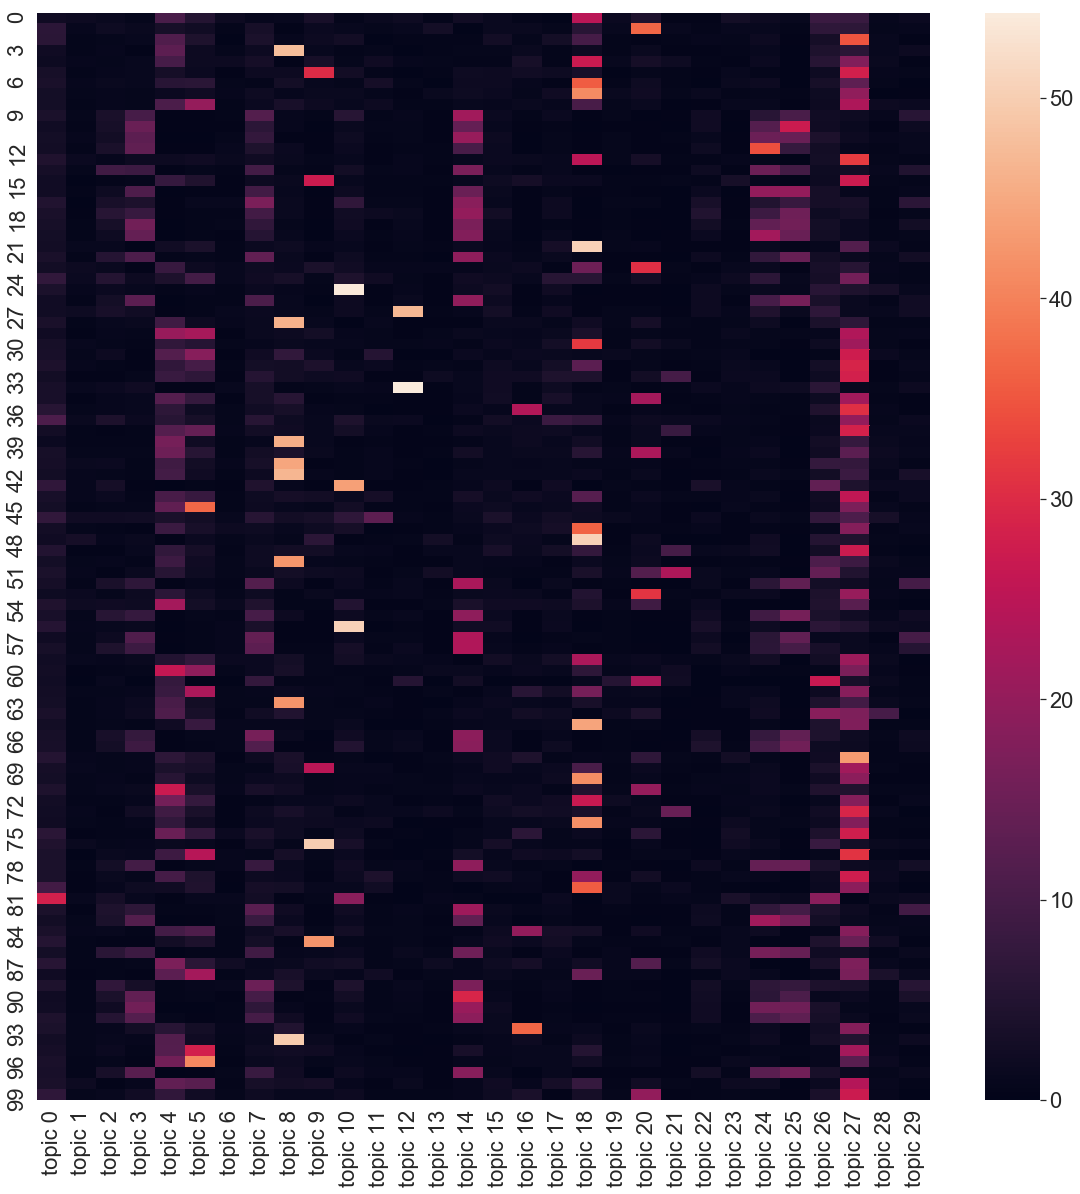

In [222]:
# Average topic distribution across the 100 businesses 
sns.set(font_scale=2)
plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(stat_df.drop(['business_id','name','category'],axis = 1))

In [209]:
stat_stat_df = stat_df.describe()
stat_stat_df

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,...,topic 20,topic 21,topic 22,topic 23,topic 24,topic 25,topic 26,topic 27,topic 28,topic 29
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.879772,0.796893,1.927835,3.552927,6.292123,5.203459,0.741085,4.408498,5.385039,2.797239,...,3.450225,1.113981,1.146821,0.893873,4.187116,4.005913,3.932071,12.807440,1.050023,1.482396
std,2.904896,0.488652,1.701065,4.549292,6.200200,7.736728,0.403986,4.061421,12.026360,7.764930,...,7.127486,3.051552,1.043403,0.671591,5.932697,6.361428,3.956213,10.581326,1.094857,1.913869
min,1.578591,0.136137,0.249867,0.108456,0.064236,0.000000,0.000000,0.516761,0.214608,0.125381,...,0.060491,0.017744,0.000000,0.000000,0.000000,0.000000,0.504386,0.000000,0.103996,0.000000
25%,2.651065,0.515821,0.806363,0.681068,0.348991,0.667280,0.489764,1.679847,0.996523,0.393314,...,0.413628,0.213690,0.358183,0.413878,0.826175,0.174378,1.984810,2.531377,0.556576,0.473233
50%,3.250579,0.658949,1.189509,1.183875,5.715097,2.282842,0.651030,2.466326,1.716727,0.788213,...,0.981233,0.345849,0.632476,0.774763,1.507934,0.403449,2.829999,11.340436,0.802395,0.869216
75%,4.010025,0.990115,2.955096,4.750059,10.087361,5.381207,0.897584,6.383800,2.982021,1.619681,...,1.984364,0.650015,1.840252,1.096156,6.044161,7.862794,4.194579,20.695429,1.215381,1.607864
max,28.378305,3.068560,9.312985,15.763474,27.063594,40.696050,2.442934,16.964400,49.697561,49.946390,...,36.874209,23.198482,4.739064,3.798859,34.307298,27.144516,26.837289,43.169065,10.107275,9.933943


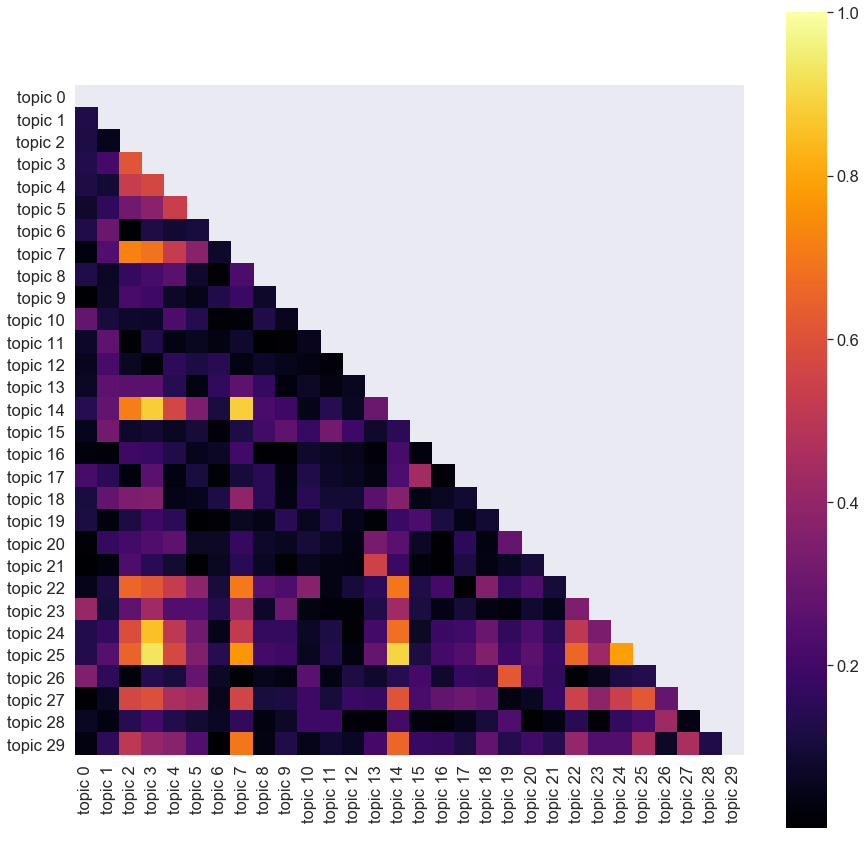

In [220]:
# taking the abs value of the correlation values between each topics.
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 15))
corr = stat_df.corr()
corr = abs(corr)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, cmap = 'inferno')

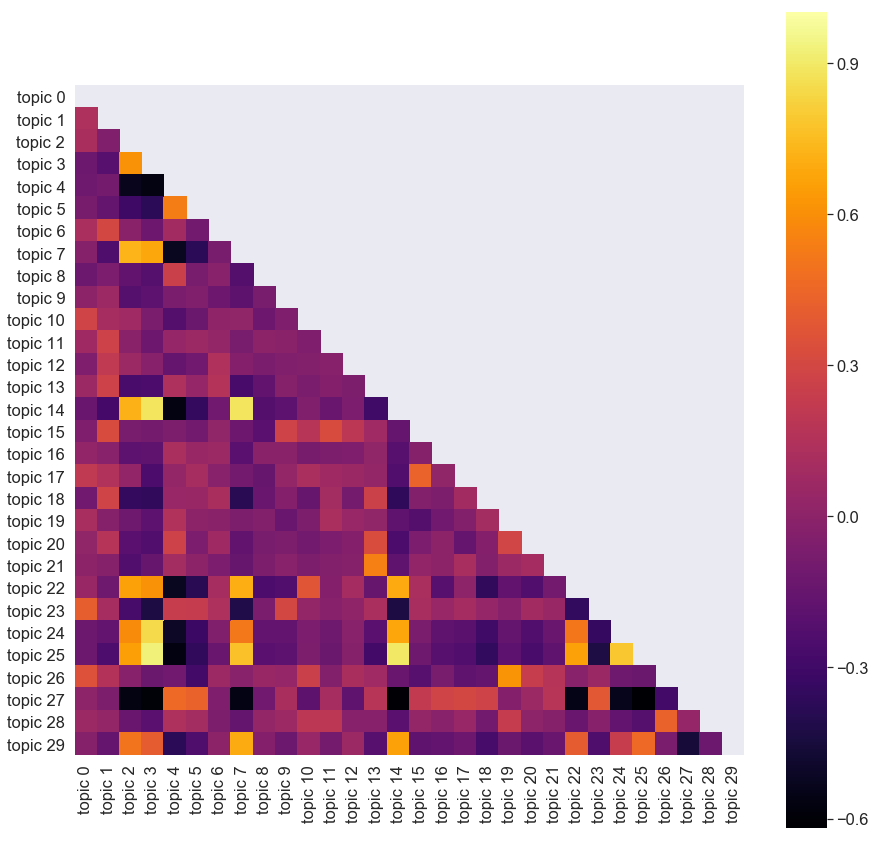

In [221]:
# non abs correlation values between each topics, from the 20,000 corpus 

f, ax = plt.subplots(figsize=(15, 15))
corr = stat_df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, cmap = 'inferno')

In [212]:
# replace topic name with number
count = 0
for col in stat_stat_df.columns:
    stat_stat_df.rename(columns={col:str(count)}, inplace = True)
    count+=1

In [216]:
stat_stat_Tdf = stat_stat_df.T.reset_index()
stat_stat_Tdf.rename(columns={'index':'topics'}, inplace = True)
stat_stat_Tdf.head()

,topics,count,mean,std,min,25%,50%,75%,max
0,0,100.0,3.879772,2.904896,1.578591,2.651065,3.250579,4.010025,28.378305
1,1,100.0,0.796893,0.488652,0.136137,0.515821,0.658949,0.990115,3.068560
2,2,100.0,1.927835,1.701065,0.249867,0.806363,1.189509,2.955096,9.312985
3,3,100.0,3.552927,4.549292,0.108456,0.681068,1.183875,4.750059,15.763474
4,4,100.0,6.292123,6.200200,0.064236,0.348991,5.715097,10.087361,27.063594


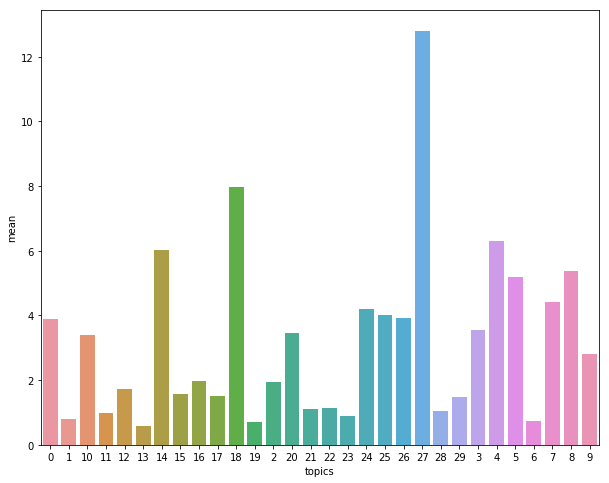

In [214]:
# plotting the average topic distribution
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x="topics",y="mean", data=stat_stat_Tdf)



In [217]:
KStat_df = pd.read_csv('KMeaned.csv')
KStat_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
KStat_df.head()

,business_id,KMeanGroup,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,...,topic 20,topic 21,topic 22,topic 23,topic 24,topic 25,topic 26,topic 27,topic 28,topic 29
0,0FUtlsQrJI7LhqDPxLumEw,1,2.316944,1.841766,1.455655,0.766688,10.522626,5.184855,1.820611,0.971169,...,4.359949,0.310949,0.312416,2.882795,1.718484,1.112601,8.368819,8.100148,0.977485,1.580758
1,0W4lkclzZThpx3V65bVgig,1,6.247231,1.033486,1.923833,1.385940,3.381270,2.473048,0.605877,3.270585,...,36.874209,1.265858,0.544051,1.071138,1.232881,0.578504,6.577596,6.556546,0.640568,0.912432
2,2iTsRqUsPGRH1li1WVRvKQ,1,5.987994,0.575344,0.772781,1.079965,11.297619,4.249134,0.147583,4.006800,...,0.322572,0.563241,0.943076,0.776258,1.866582,0.226336,3.100975,34.769070,1.246560,0.405583
3,2weQS-RnoOBhb1KsHKyoSQ,2,2.228406,0.603006,1.035680,0.360797,13.055941,1.713159,0.691727,1.757837,...,1.412371,0.310201,0.270865,0.594542,1.072503,0.137659,4.333153,6.088799,1.148005,1.808079
4,3BCsAgo_1i4xMuTyLKMLRQ,1,1.747899,1.018882,0.636233,1.108561,10.035819,1.767835,1.884558,3.124275,...,3.087254,2.096378,0.570430,0.233099,1.502649,0.013229,5.692184,17.713864,1.388517,0.417956


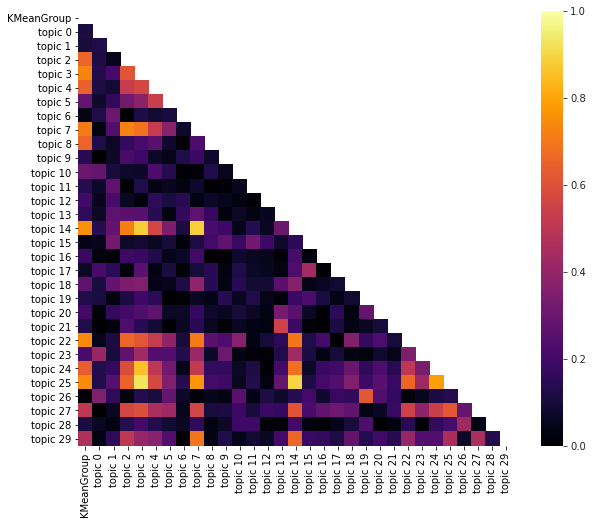

In [215]:
f, ax = plt.subplots(figsize=(10, 8))
corr = KStat_df.corr()
corr = abs(corr)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, cmap = 'inferno')